# Mobikwik

Mobikwik is a fintech focusing on mobile wallets and Buy Now Pay Later (BNPL) services. Main services include - 
1. Phone and DTH recharge
2. Bill Payments
3. Shopping in local stores
4. Transfer money to bank

In [1]:
# Load necessary libraries
import sys
import glob
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import gensim
import spacy
import numpy as np
import tqdm.notebook as tqdm
from pprint import pprint
import pickle
import plotly.express as px
import pyLDAvis

sys.path.append('/Users/pushkar/Documents/projects/fin_comp/comp/docs')

import utils.helper
from utils.helper import Processor
import importlib
importlib.reload(utils.helper)

<module 'utils.helper' from '/Users/pushkar/Documents/projects/fin_comp/comp/docs/utils/helper.py'>

In [2]:
# Load data
df = pd.read_csv('./../../data/fintech/mobikwik/mobikwik.csv')

In [3]:
# Know the shape of the loaded data
df.shape

(53210, 27)

## Preprocessing

In [4]:
processor = Processor('./../../data/config.json')

In [5]:
# Preprocess the data
pre_df, post_df = processor.preprocess(df)

In [6]:
# Create dictionaries
pre_id2word = gensim.corpora.Dictionary(pre_df['bigram'].values.tolist())
post_id2word = gensim.corpora.Dictionary(post_df['bigram'].values.tolist())

In [7]:
# Create corpus
pre_corpus = [pre_id2word.doc2bow(text) for text in pre_df['bigram'].values.tolist()]
post_corpus = [post_id2word.doc2bow(text) for text in post_df['bigram'].values.tolist()]

## Base Model

### Training

In [8]:
pre_lda_model = gensim.models.LdaMulticore(corpus=pre_corpus,
                                        id2word=pre_id2word,
                                        num_topics=10,
                                        random_state=42,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True)

In [9]:
pprint(pre_lda_model.print_topics())
pre_doc_lda = pre_lda_model[pre_corpus]

[(0,
  '0.058*"supercash" + 0.054*"cashback" + 0.046*"offer" + 0.019*"rs" + '
  '0.015*"link" + 0.015*"wallet" + 0.014*"cash" + 0.010*"offers" + '
  '0.010*"amazon" + 0.009*"use"'),
 (1,
  '0.064*"wallet" + 0.047*"referral_code" + 0.045*"sign_use" + '
  '0.031*"rs_supercash" + 0.030*"add_rs" + 0.016*"insurance_today" + '
  '0.015*"millennial_burger" + 0.015*"cleartax_mature" + '
  '0.014*"congratulations" + 0.009*"abey"'),
 (2,
  '0.022*"use" + 0.014*"recharge" + 0.011*"app" + 0.011*"kyc" + 0.010*"refund" '
  '+ 0.008*"want" + 0.007*"month" + 0.007*"better" + 0.007*"mobile" + '
  '0.006*"today"'),
 (3,
  '0.035*"account" + 0.033*"money" + 0.031*"wallet" + 0.020*"transaction" + '
  '0.018*"help" + 0.016*"payment" + 0.012*"app" + 0.011*"bank" + 0.011*"fraud" '
  '+ 0.011*"received"'),
 (4,
  '0.028*"wallet" + 0.027*"money" + 0.024*"fraud" + 0.019*"refund" + '
  '0.019*"card" + 0.017*"account" + 0.015*"company" + 0.013*"ur" + '
  '0.010*"deducted" + 0.009*"bank"'),
 (5,
  '0.034*"use" + 0

In [10]:
post_lda_model = gensim.models.LdaMulticore(corpus=post_corpus,
                                        id2word=post_id2word,
                                        num_topics=10,
                                        random_state=42,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True)

In [11]:
pprint(post_lda_model.print_topics())
post_doc_lda = post_lda_model[post_corpus]

[(0,
  '0.038*"payment" + 0.033*"refund" + 0.028*"money" + 0.027*"transaction" + '
  '0.020*"credit_card" + 0.019*"days" + 0.014*"wallet" + 0.013*"paid" + '
  '0.013*"account" + 0.011*"failed"'),
 (1,
  '0.017*"good" + 0.017*"assist_till" + 0.014*"fraud" + 0.013*"love" + '
  '0.013*"product" + 0.011*"people" + 0.009*"money_transfer" + 0.009*"remove" '
  '+ 0.009*"airtel" + 0.009*"assistance_thanks"'),
 (2,
  '0.118*"app" + 0.089*"indian" + 0.048*"support" + 0.037*"truly_indian" + '
  '0.035*"use" + 0.030*"download" + 0.029*"switch" + 0.029*"payments" + '
  '0.025*"payment" + 0.016*"india"'),
 (3,
  '0.023*"use" + 0.018*"dont" + 0.016*"app" + 0.014*"know" + 0.014*"customer" '
  '+ 0.012*"worst" + 0.010*"like" + 0.010*"local" + 0.010*"indians" + '
  '0.009*"cash"'),
 (4,
  '0.067*"recharge" + 0.035*"supercash" + 0.034*"cashback" + 0.022*"offer" + '
  '0.017*"use" + 0.017*"rs" + 0.016*"upi" + 0.014*"mobile" + '
  '0.012*"vocal_local" + 0.012*"transaction"'),
 (5,
  '0.034*"thanks" + 0.023

### Evaluation

In [12]:
pre_coherence_model_lda = gensim.models.CoherenceModel(model=pre_lda_model, 
                                                    texts=pre_df['bigram'].values.tolist(), 
                                                    dictionary=pre_id2word, 
                                                    coherence='u_mass')
pre_coherence_lda = pre_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', pre_coherence_lda)

Pre-COVID Coherence Score:  -7.334399299368529


In [13]:
post_coherence_model_lda = gensim.models.CoherenceModel(model=post_lda_model, 
                                                    texts=post_df['bigram'].values.tolist(), 
                                                    dictionary=post_id2word, 
                                                    coherence='u_mass')
post_coherence_lda = post_coherence_model_lda.get_coherence()
print('Post-COVID Coherence Score: ', post_coherence_lda)

Post-COVID Coherence Score:  -6.477673831208949


## Hyper-parameter tuning

### Pre-COVID

In [14]:
pre_df_result = processor.perform_hyperparameter_tuning(pre_corpus, 
                                                        pre_id2word, 
                                                        pre_df['bigram'].values.tolist(), 
                                                        "./../../data/fintech/mobikwik/pre.csv")

100%|██████████| 780/780 [2:50:12<00:00, 13.09s/it]  


In [15]:
# pre_df_result = pd.read_csv("./../../data/fintech/mobikwik/pre.csv")

In [16]:
# Maximum coherence
pre_df_result.sort_values('Coherence', ascending=False, inplace=True)
pre_df_result.head(10)

,Validation_Set,Topics,Alpha,Beta,Coherence
45,75.0% Corpus,3,0.9099999999999999,0.01,-3.189509
410,100% Corpus,2,symmetric,0.01,-3.329332
10,75.0% Corpus,2,0.61,0.01,-3.333552
0,75.0% Corpus,2,0.01,0.01,-3.338253
400,100% Corpus,2,0.61,0.01,-3.352428
25,75.0% Corpus,2,asymmetric,0.01,-3.363114
405,100% Corpus,2,0.9099999999999999,0.01,-3.379006
40,75.0% Corpus,3,0.61,0.01,-3.407478
50,75.0% Corpus,3,symmetric,0.01,-3.459114
415,100% Corpus,2,asymmetric,0.01,-3.516886


In [33]:
pre_ts_df = processor.create_topic_df(pre_df_result[pre_df_result['Validation_Set'] == '100% Corpus'], 
                                        'symmetric',
                                        '0.01')

<AxesSubplot: title={'center': 'Coherence Plot'}, xlabel='topics'>

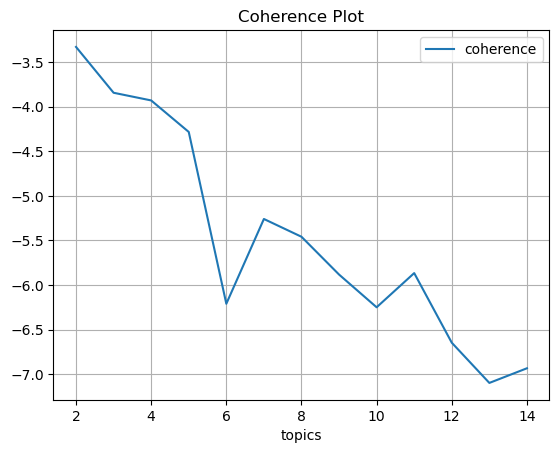

In [34]:
pre_ts_df.plot.line(x='topics', y='coherence', title='Coherence Plot', grid = True)

In [35]:
fig = px.line(pre_ts_df, x='topics', y='coherence', title='Coherence plot')
fig.show()

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



For pre-COVID period, 2 topics model is having the best coherence score.

In [37]:
pre_df_result[pre_df_result['Topics'] == 2].head(5)

,Validation_Set,Topics,Alpha,Beta,Coherence
410,100% Corpus,2,symmetric,0.01,-3.329332
10,75.0% Corpus,2,0.61,0.01,-3.333552
0,75.0% Corpus,2,0.01,0.01,-3.338253
400,100% Corpus,2,0.61,0.01,-3.352428
25,75.0% Corpus,2,asymmetric,0.01,-3.363114


### Post-COVID

In [21]:
post_df_result = processor.perform_hyperparameter_tuning(post_corpus, 
                                                        post_id2word, 
                                                        post_df['bigram'].values.tolist(), 
                                                        "./../../data/fintech/mobikwik/post.csv")

100%|██████████| 780/780 [3:14:02<00:00, 14.93s/it]  


In [22]:
# post_df_result = pd.read_csv("./../../data/fintech/mobikwik/post.csv")

In [23]:
# Maximum coherence
post_df_result.sort_values('Coherence', ascending=False, inplace=True)
post_df_result.head(10)

,Validation_Set,Topics,Alpha,Beta,Coherence
419,100% Corpus,2,asymmetric,symmetric,-3.369736
417,100% Corpus,2,asymmetric,0.61,-3.369945
418,100% Corpus,2,asymmetric,0.9099999999999999,-3.393690
415,100% Corpus,2,asymmetric,0.01,-3.539983
445,100% Corpus,3,asymmetric,0.01,-3.714513
469,100% Corpus,4,0.9099999999999999,symmetric,-3.725301
57,75.0% Corpus,3,asymmetric,0.61,-3.774813
460,100% Corpus,4,0.61,0.01,-3.788080
70,75.0% Corpus,4,0.61,0.01,-3.802515
73,75.0% Corpus,4,0.61,0.9099999999999999,-3.839222


In [38]:
post_ts_df = processor.create_topic_df(post_df_result[post_df_result['Validation_Set'] == '100% Corpus'], 
                                        'asymmetric',
                                        'symmetric')

<AxesSubplot: title={'center': 'Coherence Plot'}, xlabel='topics'>

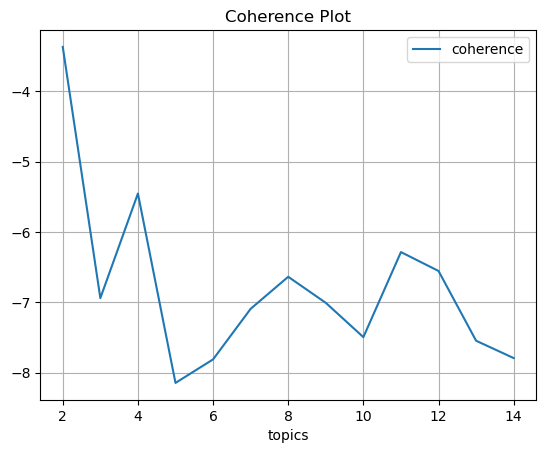

In [39]:
post_ts_df.plot.line(x='topics', y='coherence', title='Coherence Plot', grid = True)

In [40]:
fig = px.line(post_ts_df, x='topics', y='coherence', title='Coherence plot')
fig.show()

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



For the post-COVID period, the model with number of topics equal to 2 gives the best coherence score.

In [41]:
post_df_result[(post_df_result['Topics'] == 2)].head()

,Validation_Set,Topics,Alpha,Beta,Coherence
419,100% Corpus,2,asymmetric,symmetric,-3.369736
417,100% Corpus,2,asymmetric,0.61,-3.369945
418,100% Corpus,2,asymmetric,0.9099999999999999,-3.393690
415,100% Corpus,2,asymmetric,0.01,-3.539983
396,100% Corpus,2,0.31,0.31,-3.895514


## Final Models

### Pre-COVID

In [42]:
pre_final_lda_model = gensim.models.LdaMulticore(corpus=pre_corpus,
                                        id2word=pre_id2word,
                                        num_topics=2,
                                        random_state=100,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True,
                                        alpha='symmetric',
                                        eta=0.01)

In [43]:
pre_final_coherence_model_lda = gensim.models.CoherenceModel(model=pre_final_lda_model, 
                                                    texts=pre_df['bigram'].values.tolist(), 
                                                    dictionary=pre_id2word, 
                                                    coherence='u_mass')
pre_final_coherence_lda = pre_final_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', pre_final_coherence_lda)

Pre-COVID Coherence Score:  -3.273005664827731


### Post-COVID

In [45]:
post_final_lda_model = gensim.models.LdaMulticore(corpus=post_corpus,
                                        id2word=post_id2word,
                                        num_topics=2,
                                        random_state=100,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True,
                                        alpha='asymmetric',
                                        eta='symmetric')

In [46]:
post_final_coherence_model_lda = gensim.models.CoherenceModel(model=post_final_lda_model, 
                                                    texts=post_df['bigram'].values.tolist(), 
                                                    dictionary=post_id2word, 
                                                    coherence='u_mass')
post_final_coherence_lda = post_final_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', post_final_coherence_lda)

Pre-COVID Coherence Score:  -3.9840839607196297


## Inferencing

### Pre-COVID

In [47]:
pre_df_topic_sents_keywords = processor.dominant_topics(ldamodel=pre_final_lda_model, 
                                                         corpus=pre_corpus, 
                                                         texts=pre_df['bigram'].values.tolist(),
                                                         tweets=pre_df['tweet'].values.tolist())

In [48]:
pre_df_topic_sents_keywords

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,0,0.8014,"wallet, use, supercash, cashback, upi, offer, ...",@MobiKwik piss drinking human crap eating fuck...
1,0,0.9301,"wallet, use, supercash, cashback, upi, offer, ...",IRCTC UTS App Offer : Use 100% Mobikwik Superc...
2,1,0.9485,"money, account, wallet, help, refund, transact...",YOU DON'T CARE ABOUT YOUR CUSTOMERS.. AGAIN an...
3,1,0.9485,"money, account, wallet, help, refund, transact...",@MobiKwikSWAT YOU DON'T CARE ABOUT YOUR CUSTOM...
4,1,0.6141,"money, account, wallet, help, refund, transact...",@_sameernigam @PhonePeSupport @PhonePe_ Stay a...
...,...,...,...,...
16673,0,0.8121,"wallet, use, supercash, cashback, upi, offer, ...",Sign up with MobiKwik &amp; use my referral co...
16674,1,0.7497,"money, account, wallet, help, refund, transact...",@MobiKwik . give back my money.
16675,1,0.9136,"money, account, wallet, help, refund, transact...",@MobiKwikSWAT @mobikwik . please understand th...
16676,1,0.9458,"money, account, wallet, help, refund, transact...",@MobiKwikSWAT @MobiKwik Seriously I raised an ...


In [49]:
pre_df_topic_sents_keywords['Topic_Keywords'].unique()

array(['wallet, use, supercash, cashback, upi, offer, rs, app, recharge, pay',
       'money, account, wallet, help, refund, transaction, app, fraud, payment, number'],
      dtype=object)

Topics that can be inferred are:

1. Topic Number: 0
   - Probable topic title: Promotion - Cashback and Referrals
   - Key terms: 'wallet, use, supercash, cashback, upi, offer, rs, app, recharge, pay'

<br>

2. Topic Number: 1
   - Probable topic title: Issues and Queries
   - Key terms: 'money, account, wallet, help, refund, transaction, app, fraud, payment, number'

In [50]:
pre_dist, fig = processor.plot_topic_distribution(pre_df_topic_sents_keywords)
fig.show()

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



[Text(0, 0, '10473'), Text(0, 0, '6205')]

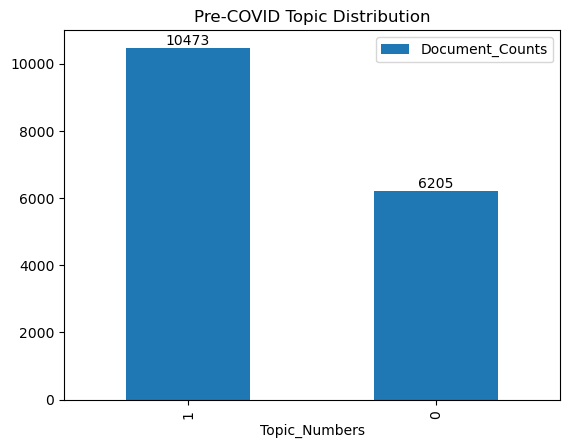

In [51]:
ax = pre_dist.plot.bar(x='Topic_Numbers', y='Document_Counts', title='Pre-COVID Topic Distribution')
ax.bar_label(ax.containers[0])

Topics don't exhibit a uniform distribution. Topics related to wallet issues are more prominent. But the company is responding to customers through Twitter.

### Post-COVID

In [52]:
post_df_topic_sents_keywords = processor.dominant_topics(
   ldamodel=post_final_lda_model, corpus=post_corpus, texts=post_df['bigram'].values.tolist(), tweets=pre_df['tweet'].values.tolist()
)

In [53]:
post_df_topic_sents_keywords

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,0,0.9464,"app, payment, thanks, wallet, money, account, ...",@MobiKwik piss drinking human crap eating fuck...
1,0,0.9735,"app, payment, thanks, wallet, money, account, ...",IRCTC UTS App Offer : Use 100% Mobikwik Superc...
2,1,0.8259,"app, indian, truly_indian, payments, support, ...",YOU DON'T CARE ABOUT YOUR CUSTOMERS.. AGAIN an...
3,1,0.6373,"app, indian, truly_indian, payments, support, ...",@MobiKwikSWAT YOU DON'T CARE ABOUT YOUR CUSTOM...
4,0,0.9257,"app, payment, thanks, wallet, money, account, ...",@_sameernigam @PhonePeSupport @PhonePe_ Stay a...
...,...,...,...,...
27555,0,0.9410,"app, payment, thanks, wallet, money, account, ...",NaN
27556,0,0.9252,"app, payment, thanks, wallet, money, account, ...",NaN
27557,0,0.9592,"app, payment, thanks, wallet, money, account, ...",NaN
27558,0,0.9395,"app, payment, thanks, wallet, money, account, ...",NaN


In [54]:
post_df_topic_sents_keywords['Topic_Keywords'].unique()

array(['app, payment, thanks, wallet, money, account, transaction, recharge, refund, help',
       'app, indian, truly_indian, payments, support, use, payment, download, apps, switch'],
      dtype=object)

Topics that can be inferred are:

1. Topic Number: 0
   - Probable topic title: Issues
   - Key terms: 'app, payment, thanks, wallet, money, account, transaction, recharge, refund, help'

<br>

2. Topic Number: 1
   - Probable topic title: Queries
   - Key terms: 'app, mobikwik, indian, truly_indian, payments, support, use, payment, download, apps'

In [58]:
post_dist, fig = processor.plot_topic_distribution(post_df_topic_sents_keywords)
fig.show()

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/pushkar/miniforge3/envs/project/lib/python3.8/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



[Text(0, 0, '17417'), Text(0, 0, '10143')]

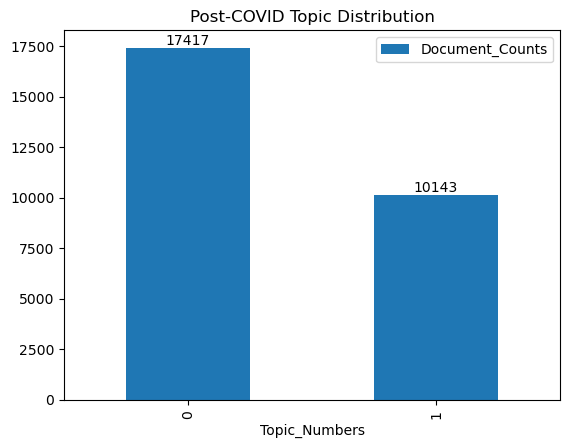

In [59]:
ax = post_dist.plot.bar(x='Topic_Numbers', y='Document_Counts', title='Post-COVID Topic Distribution')
ax.bar_label(ax.containers[0])

The distribution of topics is not uniform. People are seeking issues resolution through Twitter.

In [60]:
# Save outputs
pre_df_topic_sents_keywords.to_csv('./../../data/fintech/mobikwik/mobikwik_pre_output.csv', index=True)
post_df_topic_sents_keywords.to_csv('./../../data/fintech/mobikwik/mobikwik_post_output.csv', index=True)